In [37]:
import pickle
import csv
import os

weight = {}
dir = os.fspath(r'C:\Users\RomG\PycharmProjects\NLP_HW2\output\temp\New folder')
with open(os.path.join(dir,'final_weight_vec.pkl'),'rb') as f:
    weight = pickle.load(f)


In [44]:
from collections import defaultdict

mapping_obj_full_name = {}
mapping_obj = {}
total_dict = defaultdict(int)
# reverse_mapping_obj = {}
with open(os.path.join(dir,'1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18_19_20_21_22_23_24_25_26_features_vector_mapping.csv'),newline='') as f:
    mapping_reader = csv.reader(f)
    for row in mapping_reader:
        if row:
            idx, name = row
            feature_famly = name.split('_')[0]
            mapping_obj[int(idx)] = feature_famly
            mapping_obj_full_name[int(idx)] = name
            total_dict[feature_famly] += 1


In [43]:
zero_weighted_features = [idx for idx, value in enumerate(weight) if value==0]
missing_dict = defaultdict(int)
for idx in zero_weighted_features:
    feature_famly = mapping_obj[idx]
    missing_dict[feature_famly] += 1

for key,value in total_dict.items():
    print("feature {} empty in {:.3%}".format(key[1:],missing_dict[key]/value))


feature 1 empty in 23.026%
feature 2 empty in 22.657%
feature 3 empty in 8.108%
feature 4 empty in 100.000%
feature 5 empty in 100.000%
feature 6 empty in 100.000%
feature 7 empty in 51.780%
feature 8 empty in 49.808%
feature 9 empty in 51.809%
feature 10 empty in 39.053%
feature 11 empty in 51.546%
feature 12 empty in 51.560%
feature 13 empty in 13.351%
feature 14 empty in 24.617%
feature 15 empty in 19.800%
feature 16 empty in 19.565%
feature 17 empty in 24.593%
feature 18 empty in 11.847%
feature 19 empty in 11.995%
feature 20 empty in 50.922%
feature 21 empty in 48.602%
feature 22 empty in 51.320%
feature 23 empty in 38.891%
feature 24 empty in 51.133%
feature 25 empty in 50.796%
feature 26 empty in 11.023%


In [60]:
import numpy as np

non_z_weights = [val for val in weight if val != 0]
mean_val = np.mean(non_z_weights)
median_val =  np.median(non_z_weights)
q_3_vals = np.percentile(non_z_weights,99)


big_weighted_features = [idx for idx, value in enumerate(weight) if value > q_3_vals]
big_dict = defaultdict(int)
for idx in big_weighted_features:
    feature_famly = mapping_obj[idx]
    big_dict[feature_famly] += 1

for key,value in total_dict.items():
    print("{0} ({2:.3%})\t of feature {1} are in the 1th percential".format(big_dict[key],key[1:],big_dict[key]/value))

55 (0.550%)	 of feature 1 are in the 1th percential
40 (0.451%)	 of feature 2 are in the 1th percential
3 (8.108%)	 of feature 3 are in the 1th percential
0 (0.000%)	 of feature 4 are in the 1th percential
0 (0.000%)	 of feature 5 are in the 1th percential
0 (0.000%)	 of feature 6 are in the 1th percential
23 (0.032%)	 of feature 7 are in the 1th percential
17 (0.054%)	 of feature 8 are in the 1th percential
22 (0.031%)	 of feature 9 are in the 1th percential
35 (0.103%)	 of feature 10 are in the 1th percential
22 (0.031%)	 of feature 11 are in the 1th percential
21 (0.030%)	 of feature 12 are in the 1th percential
8 (1.068%)	 of feature 13 are in the 1th percential
343 (1.889%)	 of feature 14 are in the 1th percential
369 (2.157%)	 of feature 15 are in the 1th percential
468 (2.509%)	 of feature 16 are in the 1th percential
505 (2.658%)	 of feature 17 are in the 1th percential
143 (1.634%)	 of feature 18 are in the 1th percential
115 (2.265%)	 of feature 19 are in the 1th percential
4

In [67]:
q_1_vals = np.percentile(non_z_weights,1)

small_weighted_features = [idx for idx, value in enumerate(weight) if value < q_1_vals]
small_dict = defaultdict(int)
for idx in small_weighted_features:
    feature_famly = mapping_obj[idx]
    small_dict[feature_famly] += 1

for key,value in total_dict.items():
    print("{0} ({2:.3%})\t of feature {1} are in the 1th small percential".format(small_dict[key],key[1:],small_dict[key]/value))

233 (2.332%)	 of feature 1 are in the 1th percential
218 (2.456%)	 of feature 2 are in the 1th percential
5 (13.514%)	 of feature 3 are in the 1th percential
0 (0.000%)	 of feature 4 are in the 1th percential
0 (0.000%)	 of feature 5 are in the 1th percential
0 (0.000%)	 of feature 6 are in the 1th percential
8 (0.011%)	 of feature 7 are in the 1th percential
55 (0.176%)	 of feature 8 are in the 1th percential
9 (0.013%)	 of feature 9 are in the 1th percential
43 (0.127%)	 of feature 10 are in the 1th percential
8 (0.011%)	 of feature 11 are in the 1th percential
9 (0.013%)	 of feature 12 are in the 1th percential
25 (3.338%)	 of feature 13 are in the 1th percential
240 (1.322%)	 of feature 14 are in the 1th percential
259 (1.514%)	 of feature 15 are in the 1th percential
288 (1.544%)	 of feature 16 are in the 1th percential
260 (1.369%)	 of feature 17 are in the 1th percential
988 (11.288%)	 of feature 18 are in the 1th percential
92 (1.812%)	 of feature 19 are in the 1th percential
2

In [130]:
mapping = defaultdict(list)
for idx,value in enumerate(weight):
    key = mapping_obj[idx]
    mapping[key].append(value)

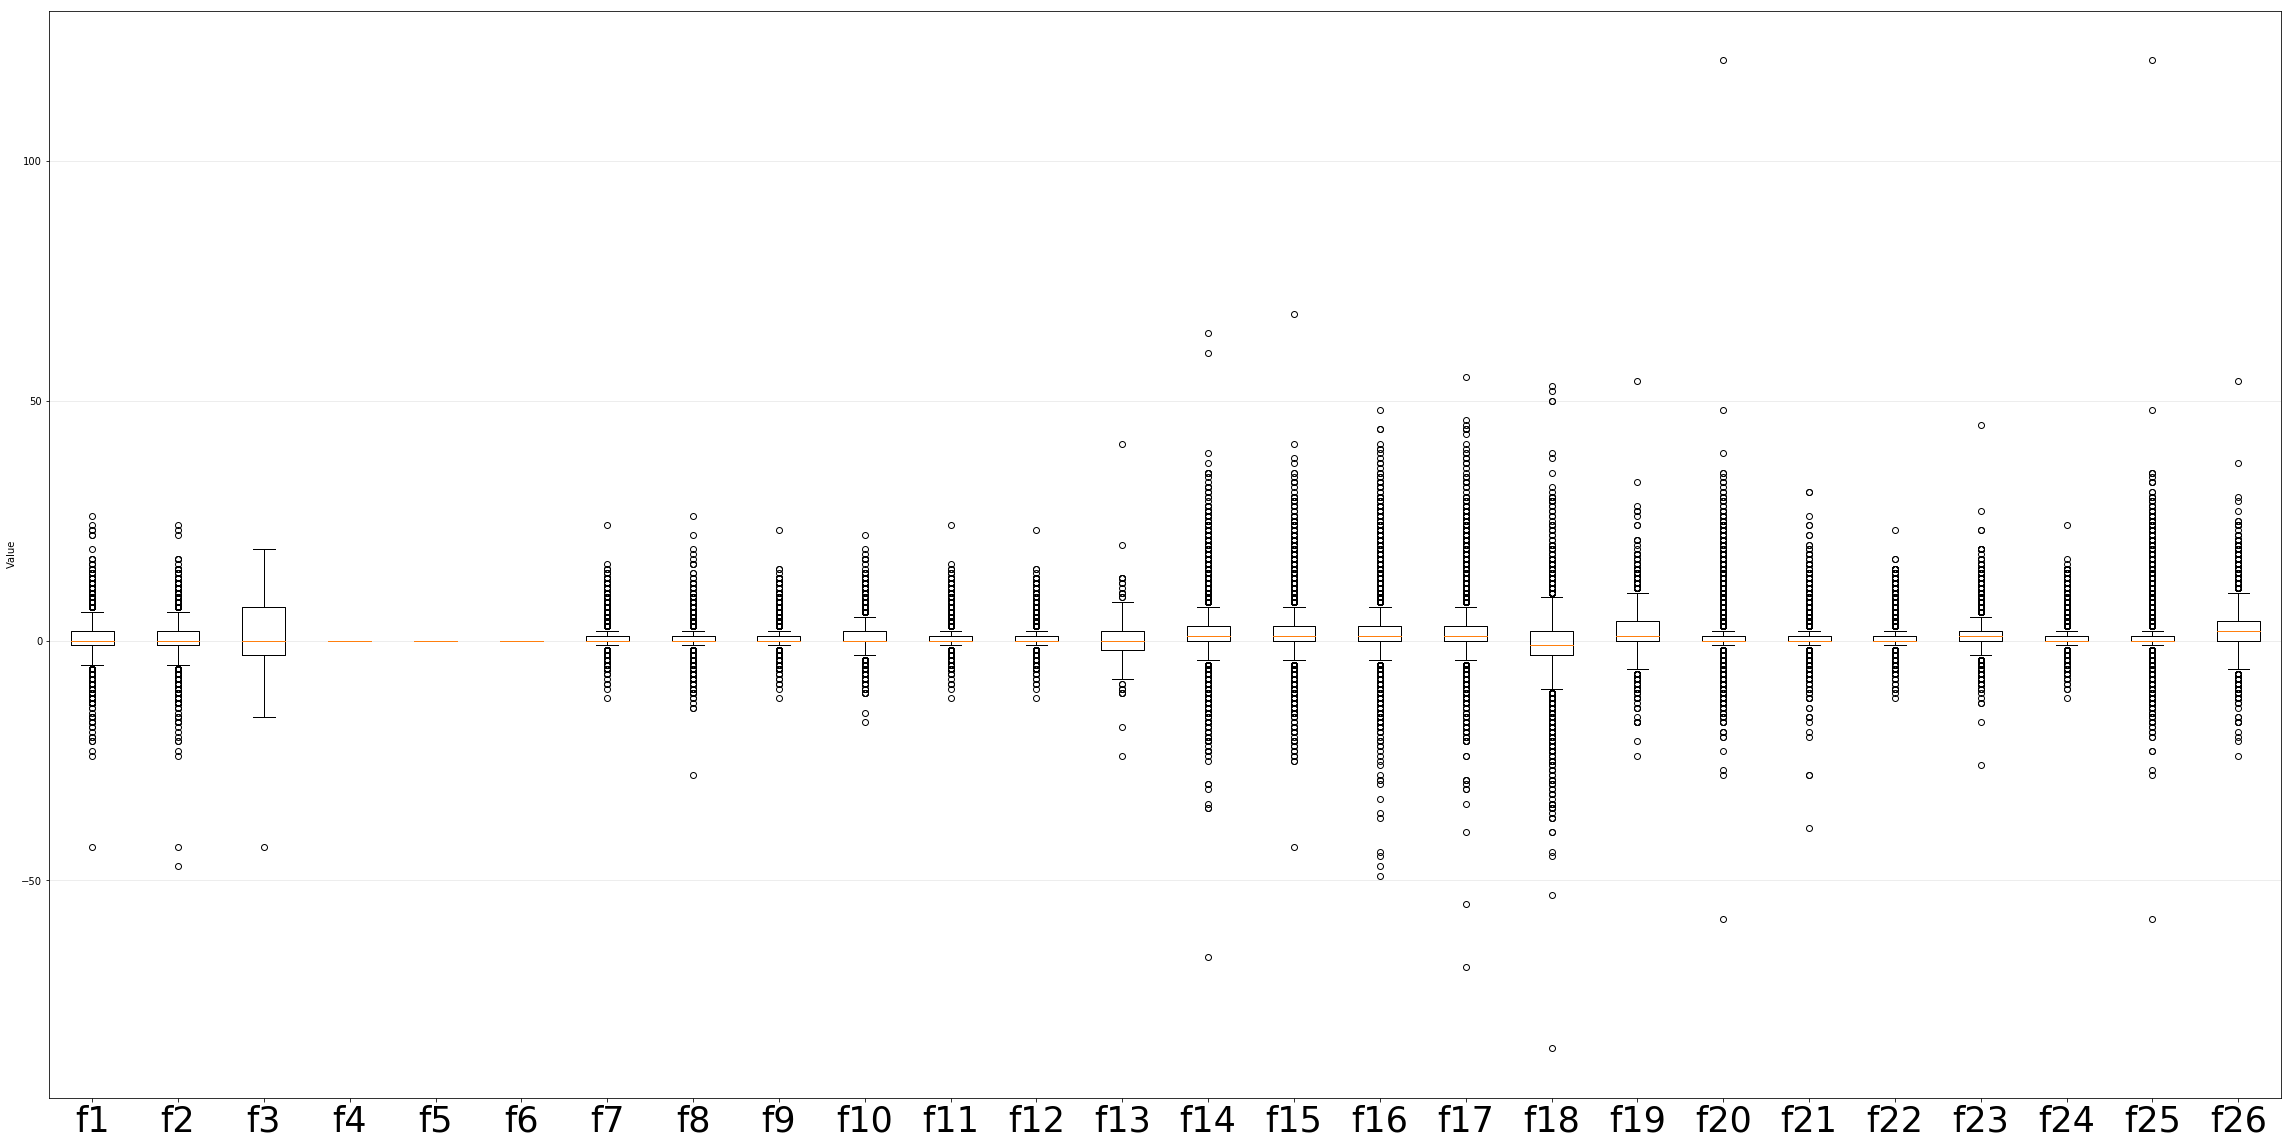

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, axes = plt.subplots(figsize=(40, 20))

data = [value for key,value in mapping.items()]
# for key, values in mapping.items():
#     axes.boxplot(values)
axes.boxplot(data)
axes.set_ylabel('Value')
axes.set_xticklabels(list(total_dict.keys()),
                   fontsize=35)   
axes.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
# plt.setp(axes, xticks=[y + 1 for y in range(len(total_dict))],
#          xticklabels=list(total_dict.keys()),fontsize=8)
plt.show()